Q.1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
 
Addition: $n\times m\times (k-1)$

Multiplication: $n\times m\times k$

For each entry in the resulting/output matrix $k-1$ additions and $k$ multiplications have to be performed. Total number of entries in the resulting/output matrix is $n \times m$. 


Q.2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

NumPy matrix multiplication is faster than a loop-based approach $O(n^3)$ because it is implemented in C, takes advantage of hardware optimizations, and uses optimized algorithms specifically designed for matrix multiplication.

In [ ]:
import numpy as np
n = 10
k = 15
m = 12
np.random.seed(0)
m1 =  np.random.randint(low =1000, high = 10000,size = (n,k))
np.random.seed(1)
m2 = np.random.randint(low =1000, high =10000, size = (k,m))
# print(m1)
# print(m2)


In [ ]:
import time
p=np.zeros((n,m))
def matrix_mul(m1,m2):
  for i in range(0, n):
      for j in range(0, m):
          for l in range(0, k):
              p[i][j] += m1[i][l] * m2[l][j]
time1 = 0
std_dev = 0
for i in range(1000):
  start = time.perf_counter()
  matrix_mul(m1,m2)
  end = time.perf_counter()
  time1+=end-start
  std_dev+= (end-start)**2
time1 = time1/1000
std_dev = std_dev/1000
std_dev = np.sqrt((std_dev - time1**2))*10**6
time1 = time1*(10**6)
print('Mean time for list of list matrix multiplication is ' + str(time1) +' milliseconds')
print('The std_dev is '+ str(std_dev) +'milliseconds')



Mean time for list of list matrix multiplication is 1331.8911310020667 milliseconds
The std_dev is 201.19465356673365milliseconds


In [ ]:
time_array = np.zeros((1000,))
for i in range(1000):
  start1 = time.perf_counter()
  q = np.matmul(m1,m2)
  end1 = time.perf_counter()
  time_array[i] = end1-start1
print('Mean time for numpy inbuilt matrix multiplication is ' + str(time_array.mean()*(10**6)) +' milliseconds')
print('The std_dev is '+ str(time_array.std()*(10**6))+' milliseconds')

Mean time for numpy inbuilt matrix multiplication is 4.43959100630309 milliseconds
The std_dev is 1.5134741022760378 milliseconds


Q.3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer : Using this method the time complexity of finding the median would be $O(n^2)$, as we will be going through the entire array $n/2$ times and each pass has $O(n)$ time complexity. The naive approach with the worst time complexity of $O(n\cdot log(n))$. In this approach, we sort the array and if number of elements is even then average of $A[n//2]$ and $A[n//2+1]$ and if odd number of elements then median will be $A[n//2+1]$. The other approach is of average $O(n)$ runtime. Below is it's algorithm:


In [ ]:
#O(n**2)
np.random.seed(3)
a = list(np.random.randint(low = 1, high = 30, size = (10,)))
# print(a)
def middle_element(a):
  n = len(a)
  if(n%2==0):
    max = n//2
    while(max>=0):
      p = 0
      for i in range(len(a)):
        if(a[i]>p):
          p = a[i]
      a.remove(p)
      if(max==1):
        q = p
      max-=1
    return((p+q)/2)
  else:
    max = n//2 -1
    while(max>=0):
      p =0
      for i in range(len(a)):
        if(a[i]>p):
          p =a[i]
      a.remove(p)
      max-=1
    return p
ans = middle_element(a)
print(ans)

15.5


In [ ]:
#using inbuilt sort
np.random.seed(3)
a = list(np.random.randint(low = 1, high = 30, size = (10,)))
def sort_median(a):
  n = len(a)
  a = sorted (a)
  if (n%2==0):
    return ((a[n//2-1]+a[n//2])/2)
  else:
    return a[n//2-1]
ans = sort_median(a)
ans


15.5

In [ ]:
# time analysis
time1 = np.zeros((1000,))
time2 = np.zeros((1000,))
time3 = np.zeros((1000,))

for i in range(1000):

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start = time.perf_counter()
  middle_element(a)
  end = time.perf_counter()
  time1[i] = end-start

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start2 = time.perf_counter()
  sort_median(a)
  end2 = time.perf_counter()
  time2[i] = end2-start2

  np.random.seed(3)
  a = list(np.random.randint(low = 1, high = 10000, size = (100,)))
  start3 = time.perf_counter()
  np.median(a)
  end3 = time.perf_counter()
  time3[i] = end3-start3

print("The mean time for O(n^2) approach is "+str(time1.mean())+" seconds")
print("The std for O(n^2) approach is "+str(time1.std())+" seconds")

print("The mean time for O(nlog(n)) approach is "+str(time2.mean())+" seconds")
print("The std for O(nlog(n)) approach is "+str(time2.std())+" seconds")

print("The mean time for inbuilt median approach is "+str(time3.mean())+" seconds")
print("The std for inbuilt median approach is "+str(time3.std())+" seconds")

The mean time for O(n^2) approach is 0.00038461270102379787 seconds
The std for O(n^2) approach is 0.0002723150543409825 seconds
The mean time for O(nlog(n)) approach is 1.9469574031973023e-05 seconds
The std for O(nlog(n)) approach is 2.3568454575506166e-05 seconds
The mean time for inbuilt median approach is 4.589497801316611e-05 seconds
The std for inbuilt median approach is 4.573850663408885e-05 seconds


Q.4. What is the gradient of the following function with respect to x and y?

Answer:
\
Gradient with respect to $x$ is $2xy + y^3 cos(x)$

Gradient with respect to $y$ is $x^2 + 3y^2 sin(x)$

Q.5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [ ]:
import jax
import jax.numpy as jnp
def gradient(params):
  x = params[0]
  y = params[1]
  g1,g2 = 2*x*y + (y**3)*(np.cos(x)), x**2 + 3*(y**2)*(jnp.sin(x))
  return g1,g2

def f(params):
  x,y = params[0], params[1]
  return x**2*(y) + y**3*(jnp.sin(x))


def jax_gradient(params,f):
  grad = jax.grad(f, argnums = 0)
  g1, g2 = grad(params)
  return g1,g2

print(gradient([3.,4.]))
print(jax_gradient([3.,4.],f))

(-39.35951978242851, DeviceArray(15.77376, dtype=float32, weak_type=True))
(DeviceArray(-39.35952, dtype=float32, weak_type=True), DeviceArray(15.77376, dtype=float32, weak_type=True))


Q.6 Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp
x, y = sp.symbols('x y')
f = x**2*(y) + y**3*(sp.sin(x))
sp.diff(f,x), sp.diff(f,y)


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

Q.7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
records = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {}
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

Q.8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [3]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

database = [
    Year(2022, [Branch('Branch 1', [Student(1, 'N', {'Maths': 100, 'English': 70}),Student(2, 'M', {'Maths': 85, 'Science': 101})]),Branch('Branch 2', []),]),
    Year(2023, [Branch('Branch 1', []),Branch('Branch 2', []),]),
    Year(2024, [Branch('Branch 1', []),Branch('Branch 2', []),]),
    Year(2025, [Branch('Branch 1', []),Branch('Branch 2', []),]),
]

print(database[0].branches[0].students[1].marks)

{'Maths': 85, 'Science': 101}


Q.9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

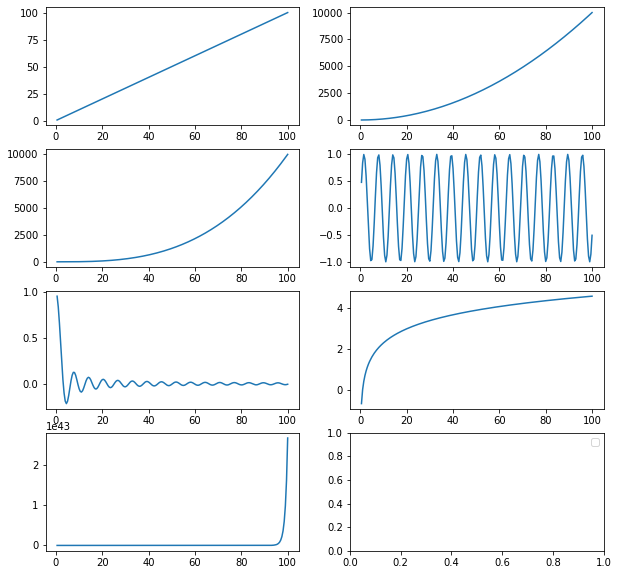

In [16]:
import matplotlib.pyplot as plt
x = np.linspace(0.5, 100,200)
f1 = x
f2 = x**2
f3 = x**3/100
f4 = np.sin(x)
f5 = np.sin(x)/x
f6 = np.log(x)
f7 = np.exp(x)
fig, axs = plt.subplots(4,2, figsize = (10,10))
axs[0,0].plot(x,f1, label = 'f1')
axs[0,1].plot(x,f2, label = 'f2')
axs[1,0].plot(x,f3, label = 'f3')
axs[1,1].plot(x,f4, label = 'f4')
axs[2,0].plot(x,f5, label ='f5')
axs[2,1].plot(x,f6, label = 'f6')
axs[3,0].plot(x,f7, label = 'f7')
plt.legend()

Q.10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [4]:
import numpy as np
import pandas as pd
np.random.seed(4)
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
std = df.std(axis =0)
mean = df.mean(axis =1)
col_max_std = std.idxmax()
row_min_mean = mean.idxmin()
print(f"Column with highest standard deviation: {col_max_std}")
print(f"Row with lowest mean: {row_min_mean}")


Column with highest standard deviation: b
Row with lowest mean: 1


Q.11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [11]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_rows = df.loc[df["g"] == "LT8"]
num_lt8_rows = lt8_rows.shape[0]
lt8_std = df.loc[df["g"] == "LT8", "f"].std()
gt8_std = df.loc[df["g"] == "GT8", "f"].std()
print(f"Number of rows where the value in the column 'g' is 'LT8': {num_lt8_rows}")
print(f"Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8': {lt8_std}")
print(f"Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8': {gt8_std}")

Number of rows where the value in the column 'g' is 'LT8': 16
Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8': 0.3464567183148825
Standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8': 0.3779397117147639


Q.12 Write a small piece of code to explain broadcasting in numpy.

In [ ]:

# Create a 2x3 array
a = np.array([[1, 2, 3], [4, 5, 6]])
print(f"Array 'a': {a}")

# Create a 1x3 array
b = np.array([7, 8, 9])
print(f"Array 'b': {b}")

# Add the two arrays together
c = a + b
print(f"Array 'c': {c}")

Q.13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [15]:
def argmin(a):
  n = len(a)
  min = a[0]
  idx = 0
  for i in range(1, n):
    if(a[i]<min):
      min = a[i]
      idx = i
  return idx

a = np.random.randint(low = 10, high = 100, size = (20, ))
answer = argmin(a)
print(answer, np.argmin(a))






16 16
